In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already done
# nltk.download('vader_lexicon')

# Sample social media dataset (replace with actual dataset if needed)
data = {
    'Post': [
        'I love this new phone, it’s amazing!',
        'I am so tired of this rainy weather, it’s ruining my day.',
        'The concert last night was absolutely fantastic!',
        'This restaurant has terrible food, won’t come back again.',
        'Had a great workout today, feeling strong!',
        'I’m feeling very sick today, I hope I get better soon.',
        'My team won the game! So happy and excited!',
        'I hate the new update of the app, it’s terrible.',
        'So excited to go on vacation next week!',
        'I feel so down today, don’t know why.'
    ]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)
df

,Post
0,"I love this new phone, it’s amazing!"
1,"I am so tired of this rainy weather, it’s ruin..."
2,The concert last night was absolutely fantastic!
3,"This restaurant has terrible food, won’t come ..."
4,"Had a great workout today, feeling strong!"
5,"I’m feeling very sick today, I hope I get bett..."
6,My team won the game! So happy and excited!
7,"I hate the new update of the app, it’s terrible."
8,So excited to go on vacation next week!
9,"I feel so down today, don’t know why."


In [12]:
# 1. Sentiment Analysis using VADER (for social media data)
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
df['VADER_sentiment'] = df['Post'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [13]:
# 2. Sentiment Analysis using TextBlob (for comparison)
df['TextBlob_sentiment'] = df['Post'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [14]:
# 3. Label sentiment as Positive, Negative, or Neutral based on the score
df['VADER_sentiment_label'] = df['VADER_sentiment'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))
df['TextBlob_sentiment_label'] = df['TextBlob_sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [15]:
# 4. Statistical Analysis: Mean, Median, Mode of Sentiment Scores
vader_mean = df['VADER_sentiment'].mean()
vader_median = df['VADER_sentiment'].median()
vader_mode = df['VADER_sentiment'].mode()[0]  # Mode can have multiple values, take the first one

textblob_mean = df['TextBlob_sentiment'].mean()
textblob_median = df['TextBlob_sentiment'].median()
textblob_mode = df['TextBlob_sentiment'].mode()[0]  # Mode can have multiple values, take the first one

# Print out the statistical metrics
print(f"VADER Sentiment Analysis:\nMean: {vader_mean:.2f}, Median: {vader_median:.2f}, Mode: {vader_mode:.2f}")
print(f"TextBlob Sentiment Analysis:\nMean: {textblob_mean:.2f}, Median: {textblob_median:.2f}, Mode: {textblob_mode:.2f}")

VADER Sentiment Analysis:
Mean: 0.22, Median: 0.45, Mode: -0.78
TextBlob Sentiment Analysis:
Mean: 0.00, Median: 0.02, Mode: -0.55


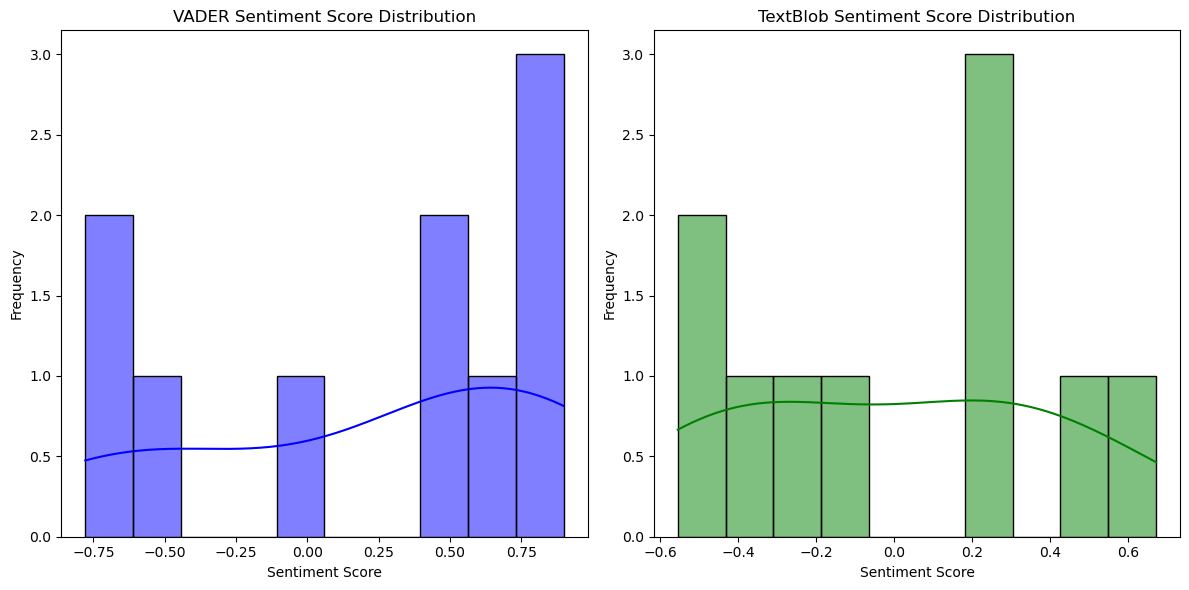

In [16]:
# 5. Visualize the Sentiment Distribution
plt.figure(figsize=(12, 6))

# Plot VADER Sentiment distribution
plt.subplot(1, 2, 1)
sns.histplot(df['VADER_sentiment'], bins=10, kde=True, color='blue')
plt.title('VADER Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Plot TextBlob Sentiment distribution
plt.subplot(1, 2, 2)
sns.histplot(df['TextBlob_sentiment'], bins=10, kde=True, color='green')
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

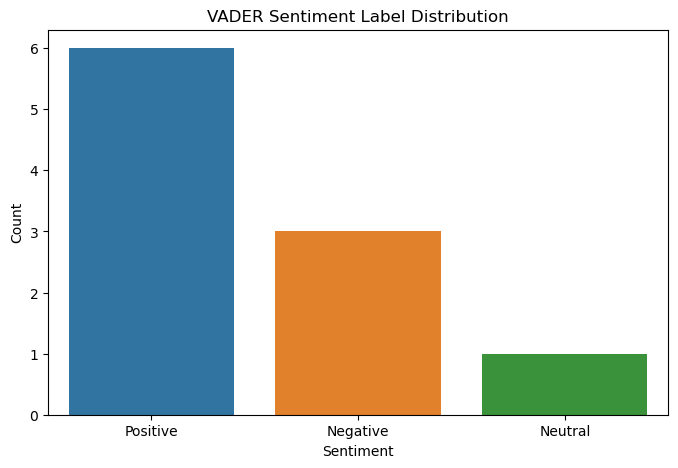

In [17]:
# 6. Visualize Sentiment Label Distribution
plt.figure(figsize=(8, 5))

# VADER sentiment label distribution
sns.countplot(x='VADER_sentiment_label', data=df,hue='VADER_sentiment_label')
plt.title('VADER Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

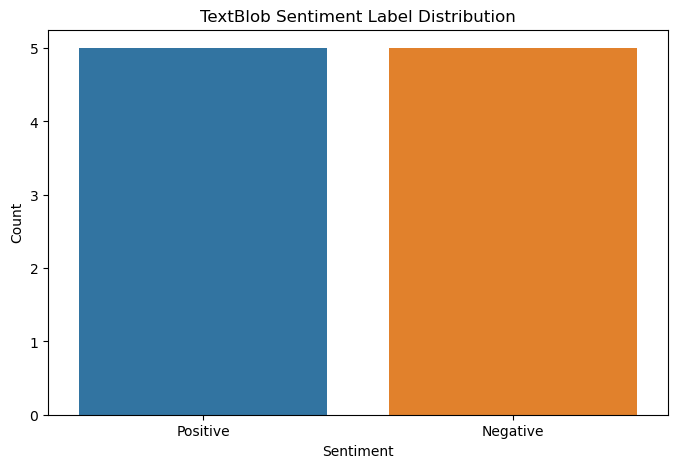

In [18]:
# TextBlob sentiment label distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='TextBlob_sentiment_label', data=df, hue='TextBlob_sentiment_label')
plt.title('TextBlob Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()